In [1]:
## Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
## Load the Data

df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
## Exploratory Data Analysis

## Missing Data

In [4]:
df.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

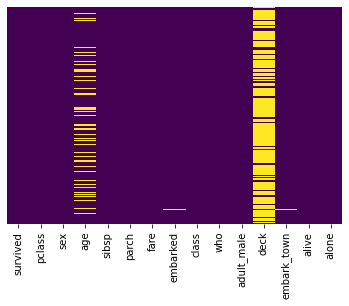

In [5]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<AxesSubplot:xlabel='survived', ylabel='count'>

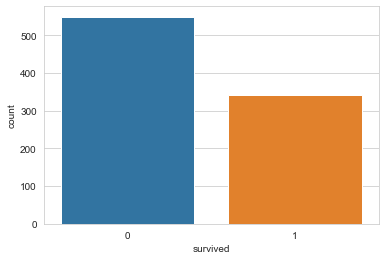

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='survived', data=df)

In [7]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

<AxesSubplot:xlabel='sex', ylabel='count'>

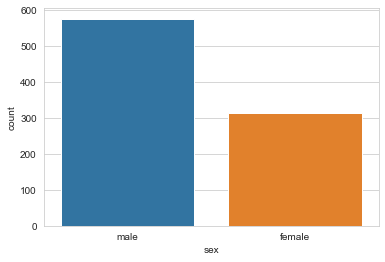

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='sex', data=df)

<AxesSubplot:xlabel='who', ylabel='count'>

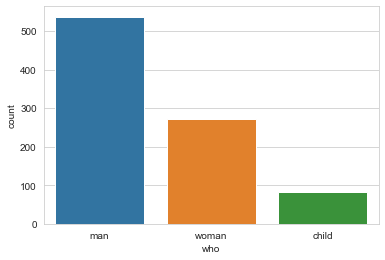

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='who', data=df)

<AxesSubplot:xlabel='survived', ylabel='count'>

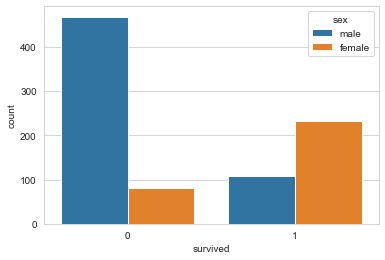

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='survived', hue='sex', data=df, palette=None)

<AxesSubplot:xlabel='survived', ylabel='count'>

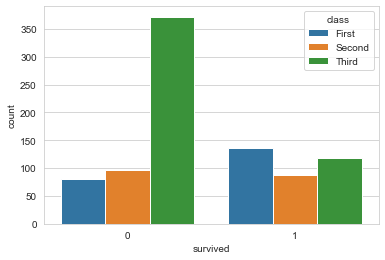

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='survived', hue='class', data=df)

In [12]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

<AxesSubplot:xlabel='alive', ylabel='count'>

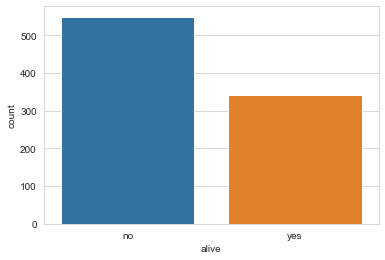

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='alive', data=df)

<AxesSubplot:xlabel='survived', ylabel='count'>

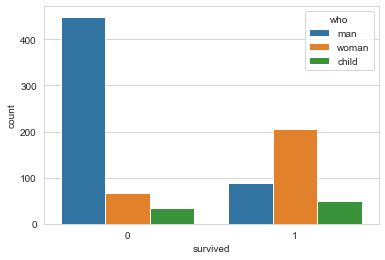

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='survived', hue='who', data=df)

In [15]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

<AxesSubplot:xlabel='age'>

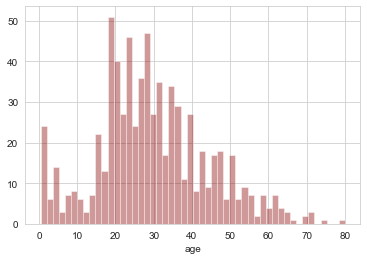

In [16]:
sns.distplot(df['age'].dropna(), bins=50, kde=False, color='darkred')

<AxesSubplot:xlabel='age', ylabel='Density'>

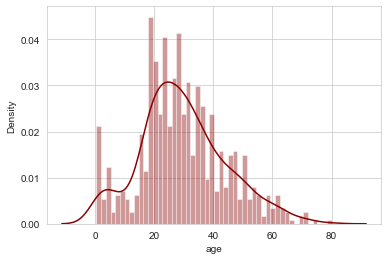

In [17]:
sns.distplot(df['age'].dropna(), bins=50, kde=True, color='darkred')

<AxesSubplot:>

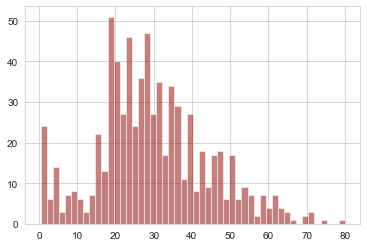

In [18]:
df['age'].hist(bins=50, color='darkred', alpha=0.5)

<AxesSubplot:xlabel='sibsp', ylabel='count'>

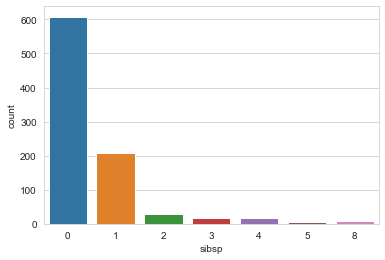

In [19]:
sns.countplot(x='sibsp', data=df)

<AxesSubplot:>

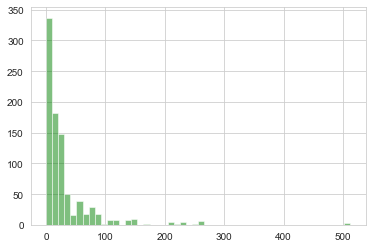

In [20]:
df['fare'].hist(bins=50, color='green', alpha=0.5)

In [21]:
## Data Cleaning

<AxesSubplot:xlabel='class', ylabel='age'>

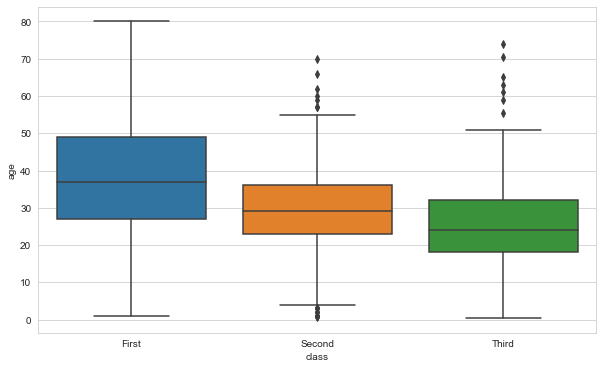

In [22]:
plt.figure(figsize=(10,6))
sns.boxplot(x='class', y='age', data=df)

In [23]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [24]:
df['age'].mean()

29.69911764705882

<AxesSubplot:xlabel='pclass', ylabel='age'>

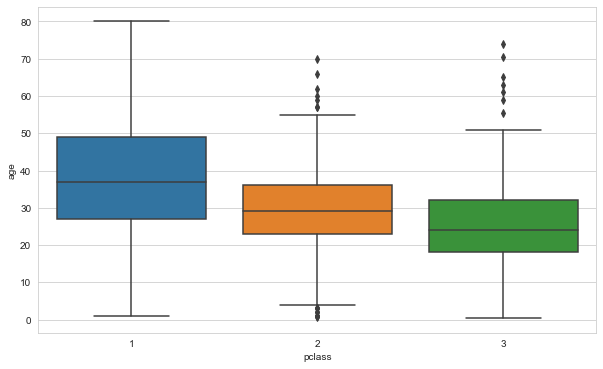

In [25]:
plt.figure(figsize=(10,6))
sns.boxplot(x='pclass', y='age', data=df)

In [26]:
def impute_age(cols):
    age = cols[0]
    pclass = cols[1]

    if pd.isnull(age):
        if pclass == 1:
            return 37
        elif pclass == 2:
            return 29
        else:
            return 24

    else:
        return age        

In [27]:
## apply the function to the dataframe

In [28]:
df['age'] = df[['age', 'pclass']].apply(impute_age, axis=1)

<AxesSubplot:>

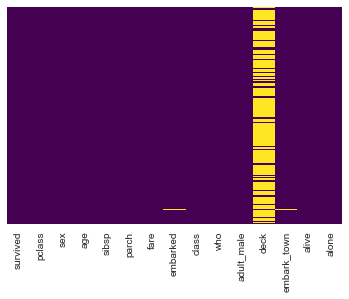

In [29]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [30]:
df.drop('deck', axis=1, inplace=True)

In [31]:
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [32]:
df.dropna(inplace=True)

<AxesSubplot:>

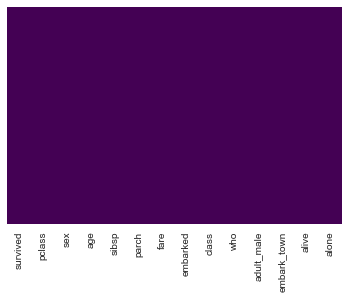

In [33]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [34]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [35]:
## Converting Categorical Features

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     889 non-null    int64   
 1   pclass       889 non-null    int64   
 2   sex          889 non-null    object  
 3   age          889 non-null    float64 
 4   sibsp        889 non-null    int64   
 5   parch        889 non-null    int64   
 6   fare         889 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        889 non-null    category
 9   who          889 non-null    object  
 10  adult_male   889 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        889 non-null    object  
 13  alone        889 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 86.1+ KB


In [36]:
pd.get_dummies(df['embarked'], drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [37]:
sex = pd.get_dummies(df['sex'], drop_first=True)
embark = pd.get_dummies(df['embarked'], drop_first=True)

In [38]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [39]:
df.drop(['embark_town', 'alive', 'alone', 'class', 'who', 'adult_male'], axis=1, inplace=True)

In [40]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [41]:
sex = pd.get_dummies(df['sex'], drop_first=True)

In [42]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [43]:
df = pd.concat([df, sex, embark], axis=1)

In [44]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,male,Q,S
0,0,3,male,22.0,1,0,7.2500,S,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,1,0,1


In [45]:
df.drop(['sex'], axis=1, inplace=True)

In [46]:
df.head()

,survived,pclass,age,sibsp,parch,fare,embarked,male,Q,S
0,0,3,22.0,1,0,7.2500,S,1,0,1
1,1,1,38.0,1,0,71.2833,C,0,0,0
2,1,3,26.0,0,0,7.9250,S,0,0,1
3,1,1,35.0,1,0,53.1000,S,0,0,1
4,0,3,35.0,0,0,8.0500,S,1,0,1


In [47]:
## Building a Logistic Regression

## Train Test Split

In [48]:
df.drop('survived', axis=1).head()

,pclass,age,sibsp,parch,fare,embarked,male,Q,S
0,3,22.0,1,0,7.2500,S,1,0,1
1,1,38.0,1,0,71.2833,C,0,0,0
2,3,26.0,0,0,7.9250,S,0,0,1
3,1,35.0,1,0,53.1000,S,0,0,1
4,3,35.0,0,0,8.0500,S,1,0,1


In [49]:
df['survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [50]:
df.drop('embarked', axis=1).head()

,survived,pclass,age,sibsp,parch,fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [59]:
df.head()

,survived,pclass,age,sibsp,parch,fare,embarked,male,Q,S
0,0,3,22.0,1,0,7.2500,S,1,0,1
1,1,1,38.0,1,0,71.2833,C,0,0,0
2,1,3,26.0,0,0,7.9250,S,0,0,1
3,1,1,35.0,1,0,53.1000,S,0,0,1
4,0,3,35.0,0,0,8.0500,S,1,0,1


In [60]:
df.drop('embarked', axis=1, inplace=True)

In [61]:
df.head()

,survived,pclass,age,sibsp,parch,fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [62]:
## Revised Training and Predicting

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('survived', axis=1),
                                                    df['survived'], test_size=0.3,
                                                     random_state=101)

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression()

In [69]:
predictions = logmodel.predict(X_test)

In [70]:
from sklearn.metrics import classification_report, confusion_matrix

In [71]:
accuracy = confusion_matrix(y_test, predictions)

In [73]:
accuracy

array([[147,  16],
       [ 30,  74]], dtype=int64)

In [75]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predictions)
print("Accuracy of the Model is: ", accuracy)

Accuracy of the Model is:  0.8277153558052435


In [76]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)